In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
bos = pd.DataFrame(boston.data)

In [6]:
bos['Price'] = boston.target

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

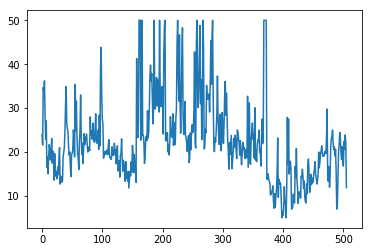

In [8]:
bos['Price'].plot(kind='line')
plt.show()

In [9]:
bos['Price'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: Price, dtype: float64

In [10]:
## Outlier calculation
Upper_limit = 25 + 1.5 * (25-17)
Lower_limit = 17 - 1.5 * (25-17)
print('Upper_limit :', Upper_limit)
print('Lower_limit :', Lower_limit)

Upper_limit : 37.0
Lower_limit : 5.0


In [11]:
df1 = bos[bos['Price']>37]
print(df1.shape)
df2 = bos[bos['Price']<5]
print(df2.shape)

(37, 14)
(0, 14)


Outliers can be prices of houses which are highly priced. Let's not drop these rows while building our model

In [12]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
bos.drop('Price',axis=1,inplace=True)
bos.columns = boston.feature_names

In [14]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
X=bos
y= boston.target

In [16]:
X.shape

(506, 13)

In [17]:
y.shape

(506,)

In [18]:
y=pd.Series(y)

In [19]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [21]:
y.isnull().sum()

0

In [22]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print('Coefficients:', lin_reg.coef_)
print('Intercept:', lin_reg.intercept_)
print('R^2 score:', lin_reg.score(X,y))

Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept: 36.45948838509009
R^2 score: 0.7406426641094095


In [27]:
ypred = lin_reg.predict(X)

In [28]:
sse = ((y-ypred)**2).sum()
ssr = ((ypred-y.mean())**2).sum()
sst = sse + ssr
r = ssr/sst
print(r)

0.7406426641094089


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_score=[]
test_score=[]
for i in range(30):
    X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = i)
    lin_reg = LinearRegression()
    model = lin_reg.fit(X_train,y_train)
    train_score.append(lin_reg.score(X_train, y_train))
    test_score.append(lin_reg.score(X_test, y_test))

In [31]:
print('Average training R^2 score for 30 different random test-train split:', np.mean(train_score))
print('Average testing R^2 score for 30 different random test-train split:', np.mean(test_score))

Average training R^2 score for 30 different random test-train split: 0.7454245776235885
Average testing R^2 score for 30 different random test-train split: 0.7116044568779549


The model fits well